In [1]:
setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/data")

library(data.table)

source("/mnt/lareaulab/reliscu/code/analyzeSyntheticDatasets/makeSyntheticDatasets_0.53.r")

Here I make pseudobulk samples, where each sample contains a mix of cell types

In [2]:
counts <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_gene_counts.csv", data.table=FALSE)
cell_meta <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_sampleinfo.csv", data.table=FALSE)

In [3]:
dim(cell_meta)

[1] 9573   25

In [4]:
all.equal(colnames(counts)[-1], cell_meta$Cell_ID)

[1] TRUE

In [5]:
sort(table(cell_meta$cell_subclass))


        L4       Peri         CR      Meis2        SMC       VLMC   Serpinf1 
         3          4         11         11         55         72         78 
Macrophage       Endo      Oligo        L6b       Sncg      Astro    L2/3 IT 
        85         96         98        145        148        215        325 
     L6 CT      L5 PT      L6 IT         NP      Pvalb      Lamp5        Sst 
       350        368        394        542        896        913       1139 
       Vip      L5 IT 
      1224       2401 

In [6]:
# Remove cell types with < *20 cells:

ctype_counts <- table(cell_meta$cell_subclass)
low_abund_ctypes <- names(ctype_counts)[ctype_counts < 20]
keep <- which(!cell_meta$cell_subclass %in% low_abund_ctypes)
cell_meta <- cell_meta[keep,]
counts <- counts[,c(1, keep + 1)]

all.equal(colnames(counts)[-1], cell_meta$Cell_ID)

[1] TRUE

In [7]:
sort(table(cell_meta$cell_subclass))


       SMC       VLMC   Serpinf1 Macrophage       Endo      Oligo        L6b 
        55         72         78         85         96         98        145 
      Sncg      Astro    L2/3 IT      L6 CT      L5 PT      L6 IT         NP 
       148        215        325        350        368        394        542 
     Pvalb      Lamp5        Sst        Vip      L5 IT 
       896        913       1139       1224       2401 

In [13]:
cell.name = which(colnames(cell_meta) == "Cell_ID")
cell.type = which(colnames(cell_meta) == "cell_subclass")
pcnt.cells <- 25

cell_frac <- data.frame(table(cell_meta$cell_subclass) / nrow(cell_meta))
cell_meta$Freq <- cell_frac$Freq[match(cell_meta$cell_subclass, as.character(cell_frac[,1]))]
cell.frac = which(colnames(cell_meta) == "Freq")

In [ ]:
# pcnt.var <- 100

# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     cell.frac=cell.frac,
#     pcnt.cells=pcnt.cells,
#     pcnt.var=pcnt.var,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [7]:
# kappa <- 15 

# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     pcnt.cells=pcnt.cells,
#     kappa=kappa,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [ ]:
SD <- 100

makeSyntheticDatasets(
    expr=counts,
    sampleindex=c(2:ncol(counts)),
    cell.info=cell_meta,
    cell.name=cell.name,
    cell.type=cell.type,
    cell.frac=cell.frac,
    pcnt.cells=pcnt.cells,
    SD=SD,
    no.samples=200,
    no.datasets=1,
    with.replacement=TRUE
)

In [9]:
# Debugging

expr <- counts
sampleindex=c(2:ncol(counts))
cell.info=cell_meta
cell.name=cell.name
cell.type=cell.type
cell.frac=cell.frac
pcnt.cells=20
pcnt.var=75
no.samples=50
no.datasets=1
i=1
with.replacement=TRUE

## Check to ensure rows of cell.info and columns of expr are in same order:
if(all.equal(colnames(expr[,sampleindex]),as.character(cell.info[,cell.name]))!=TRUE){
    stop("Cell names in expr and cell.info do not match!")
}

no.cells=round(length(sampleindex)*pcnt.cells*.01)
meta=min(sampleindex)-1
print(paste("Building dataset ",i,"...",sep=""))

if(is.null(cell.type)){
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+1,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    colnames(dat.legend)=c("Cell.name",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=1
    
} else {
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+2,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    dat.legend[,2]=as.character(cell.info[,cell.type])
    colnames(dat.legend)=c("Cell.name","Cell.type",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=2
    
}

dat.synth=matrix(nrow=nrow(expr),ncol=no.samples,data=-88)
colnames(dat.synth)=paste("Sample",c(1:no.samples),sep="")


[1] "Building dataset 1..."


In [ ]:
# SD=20
# all.ct=unique(as.character(cell.info[,cell.type]))
# cells.per.sample=c()
# k=1 # Astrocytes only for now

# for(j in 1:no.samples) {

#     sample.vec=c()
#     rest1=is.element(cell.info[,cell.type],all.ct[k])
#     base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
    
#     if(SD==0){
        
#         sample.vec=c(sample.vec,(sample(c(1:nrow(cell.info))[rest1],base.cells,replace=with.replacement)))
            
#     } else {
        
#         # The below code imposes the same variability around the true number of cells across each cell type
#         act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),0)
#         cells.per.sample=c(cells.per.sample,act.cells)
#         sample.vec=c(sample.vec,sample(c(1:nrow(cell.info))[rest1],act.cells,replace=with.replacement))
#     }

#     sample.vec=sort(sample.vec)
#     dat.synth[,j]=apply(as.data.frame(expr[,sample.vec+meta]),1,sum,na.rm=T)
#     sample.counts=table(sample.vec)
#     dat.legend[as.numeric(names(sample.counts)),j+leg.meta]=as.numeric(sample.counts) # No longer binary indicator... some cells will be sampled more than once

#     # sample.vec=sort(sample.vec)
#     # #Check: table(cell.info$Cell.Class[sample.vec])
#     # dat.synth[,j]=apply(as.data.frame(expr[,sample.vec+meta]),1,sum,na.rm=T)
#     # dat.legend[sample.vec,j+leg.meta]=1

# } ## end of for(k in 1:length(all.ct)){

In [ ]:
astro_genes <- c("Slc1a3", "Gpr37l1", "Plpp3", "Gja1", "Prdx6", "Htra1", "Ntsr2", "S1pr1", "Cldn10", "Aldoc", "Acsbg1", "F3", "Fam107a", "Mfge")
astro_genes_idx <- which(expr[,meta] %in% astro_genes)
astro_sample_idx = which(dat.legend[,2] == "Astro")
astro_meta_gene <- colMeans(dat.synth[astro_genes_idx,])

# This should be correlated if legend is tracking true abundance of astroctyes in each sample:

cor(astro_meta_gene, cells.per.sample)

ERROR: Error in `[.data.table`(expr, , meta): j (the 2nd argument inside [...]) is a single symbol but column name 'meta' is not found. If you intended to select columns using a variable in calling scope, please try DT[, ..meta]. The .. prefix conveys one-level-up similar to a file system path.


In [ ]:
# mean(colMeans(expr[astro_genes_idx, astro_sample_idx+meta]))
# mean(colMeans(expr[astro_genes_idx,-c(1,2)]))

[1] 2495.728

In [ ]:
# pcnt.var=1
# all.ct=unique(as.character(cell.info[,cell.type]))
# sample.vec=c()

# for (ctype in all.ct) {
#     k <- which(all.ct == ctype)
#     rest1=is.element(cell.info[,cell.type],all.ct[k])
#     base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))

#     act.cell.range=c(round(base.cells-(base.cells*pcnt.var*.01)):round(base.cells+(base.cells*pcnt.var*.01)))
#     n_sampled <- c()
#     for (j in 1:no.samples) {
#         act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
#         n_sampled=c(n_sampled, act.cells)
#     }
#     sample.vec <- c(sample.vec, sd(n_sampled))
# }

In [ ]:
# sample.vec=c()

# for(j in 1:no.samples){
        
#     all.ct="L4" #unique(as.character(cell.info[,cell.type]))
    
    
#     for(k in 1:length(all.ct)){
        
#         rest1=is.element(cell.info[,cell.type],all.ct[k])
#         base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
        
#         if(SD==0){
            
#                 sample.vec=c(sample.vec,(sample(c(1:nrow(cell.info))[rest1],base.cells,replace=with.replacement)))
                
#         } else {
            
#             # The below code imposes the same variability around the true number of cells across each cell type
#             act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),1)
#             sample.vec=c(sample.vec,act.cells)
#         }

#     } ## end of for(k in 1:length(all.ct)){

# }

In [ ]:
# act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),1)
# sample.vec=sample(c(1:nrow(cell.info))[rest1],act.cells,replace=with.replacement)
# sample.vec

[1] 5110 3688 3688 3688 4380 4380 3688 3688 3688 4380 5110 3688 3688 5110 3688
[16] 5110

In [15]:
expr <- fread("SyntheticDatasets/SyntheticDataset1_20pcntCells_30pcntVar_200samples_10-04-30.csv")
legend <- fread("SyntheticDatasets/SyntheticDataset1_20pcntCells_30pcntVar_200samples_legend_10-04-30.csv")

In [62]:
astro_genes <- c("Slc1a3", "Gpr37l1", "Plpp3", "Gja1", "Prdx6", "Htra1", "Ntsr2", "S1pr1", "Cldn10", "Aldoc", "Acsbg1", "F3", "Fam107a", "Mfge")
astro_genes_idx <- which(expr$Gene %in% astro_genes)
meta_gene <- colSums(expr[astro_genes_idx, -1])
n_astro_cells <- colSums(legend[legend$Cell.type == "Astro", -c(1,2)])
n_cells <- colSums(legend[,-c(1,2)])
astro_frac <- n_astro_cells / n_cells # nrow(legend)

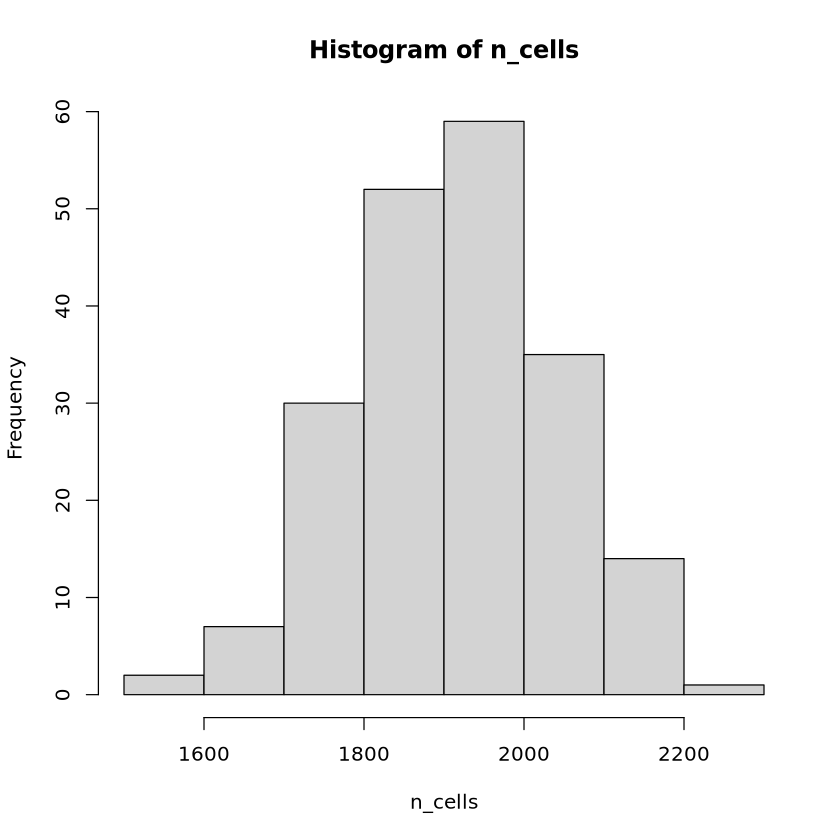

In [63]:
hist(n_cells)

In [64]:
cor(meta_gene, astro_frac)

[1] 0.8429013

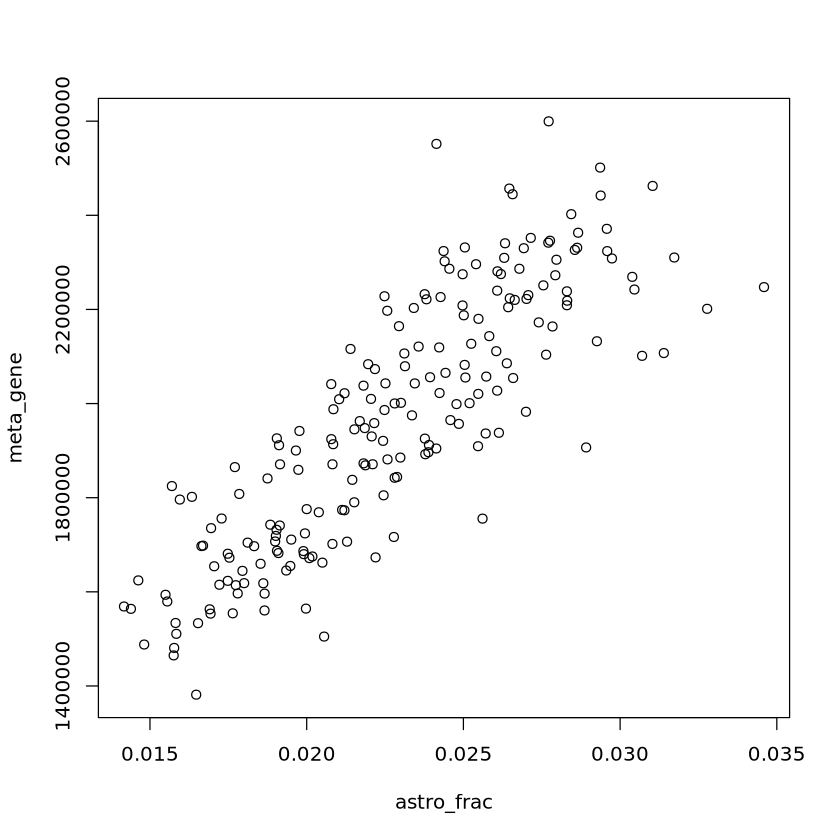

In [65]:
plot(astro_frac, meta_gene)

In [67]:
module_eig <- fread("../tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.803_minSize3_merge_ME_0.9_20151/Module_eigengenes_10-35-57.csv", data.table=FALSE)

In [70]:
cor(module_eig[,"yellow"], astro_frac)

[1] 0.9412216